# thực nghiệm 2 xóa dữ liệu bị thiếu:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

> lấy dữ liệu

In [2]:
recipe = pd.read_csv('epi_r.csv')

In [3]:
data1=recipe.copy()
data1

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> xem mô tả dữ liệu để xem về vùng phân bố:

In [4]:
recipe.dtypes

title          object
rating        float64
calories      float64
protein       float64
fat           float64
               ...   
cookbooks     float64
leftovers     float64
snack         float64
snack week    float64
turkey        float64
Length: 680, dtype: object

In [5]:
recipe.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
recipe = (recipe.dropna(axis=0)).copy()
recipe.reset_index(drop = True,inplace=True)
data2=recipe.copy()
recipes=recipe.copy()

> xóa dự liệu không thể 

In [7]:
a=[]
for i in range(len(recipes)):
    if(recipes["rating"][i]>0)and  (recipes["calories"][i]>0) and (recipes["protein"][i]>0) and (recipes["sodium"][i]>0):
        a.append(recipes.iloc[i])
recipess=pd.DataFrame(a)

In [8]:
recipess.reset_index(drop = True,inplace=True)
data3=recipess.copy()
recipess

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14006,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14007,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14008,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14009,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> loại bỏ oulier

In [9]:
def count(a,b,c):
    d=0
    for i in a[b]:
        if i>c:
            d=d+1
    print(d)
count(recipess,'calories',10000)
count(recipess,'sodium',17500)
count(recipess,'fat',550)
count(recipess,'protein',500)

20
44
28
27


In [10]:
a=[]
for i in range(len(recipess)):
    if (recipess["calories"][i]<10000 and recipess["sodium"][i]<17500 and recipess["fat"][i]<550 and recipess["protein"][i]<500) :
        a.append(recipess.iloc[i])
recipesss=pd.DataFrame(a)

In [11]:
data4=recipesss.copy()
data4

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14006,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14007,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14008,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14009,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> xóa dữ liệu trùng 

In [12]:
recipesss.reset_index(drop = True,inplace=True)
data5=recipesss[recipesss.duplicated()]
recipesss.drop_duplicates(inplace=True)

In [13]:
data5

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
421,Orange Balsamic Glaze,3.750,194.0,2.0,3.0,697.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,Golden Pineapple Chutney,4.375,262.0,2.0,1.0,438.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,Roasted Vegetables,4.375,167.0,3.0,7.0,97.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
791,Blue Cheese Coleslaw,2.500,101.0,5.0,4.0,193.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,Caramel Macadamia Nut Crunch,1.250,223.0,2.0,19.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13918,Perfect Rice,4.375,166.0,4.0,2.0,139.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13927,Grilled Fillet of Beef with Tomato Ginger Vina...,4.375,738.0,42.0,62.0,344.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13934,Cauliflower Purée,3.125,364.0,11.0,28.0,642.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13936,Chicken with White Wine and Herbs,2.500,843.0,59.0,59.0,351.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
recipesss.reset_index(drop = True,inplace=True)
recipesss

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12774,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12775,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12776,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12777,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> vẽ correclation cho bài toán 1

Text(0.5, 1, 'Correlation between rating & nutrition features of recipes')

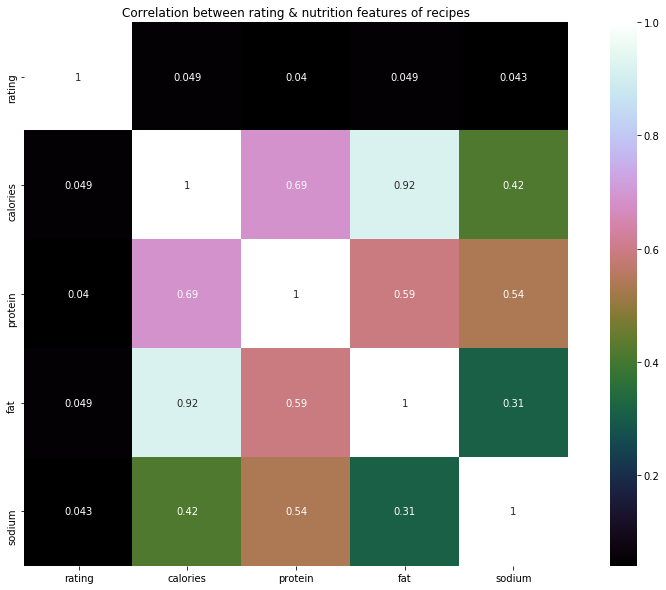

In [15]:
correlation = recipesss.iloc[:,1:6].corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation, vmax= 1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between rating & nutrition features of recipes')


Text(0.5, 1, 'Correlation between rating & nutrition features of recipes')

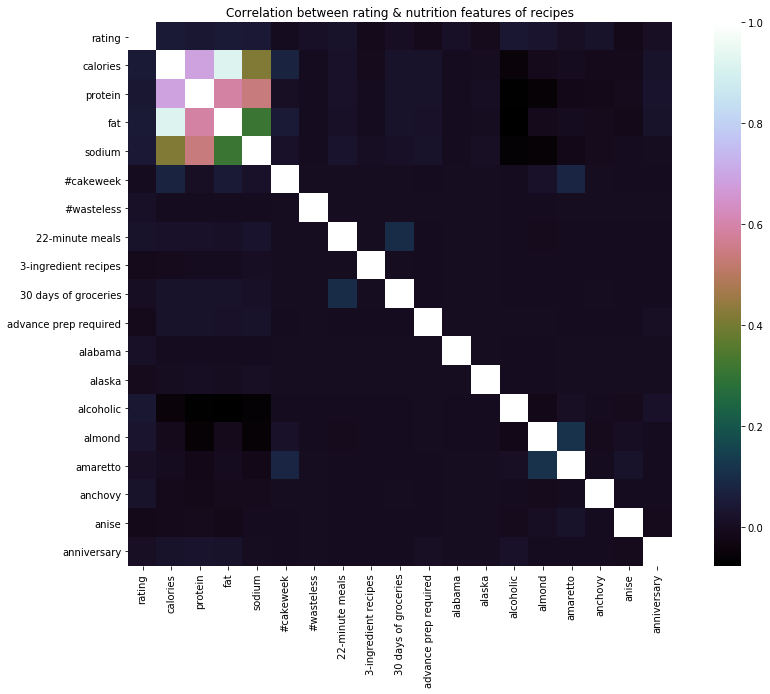

In [16]:
correlation = recipesss.iloc[:,1:20].corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation, vmax= 1, square=True,annot=False,cmap='cubehelix')
plt.title('Correlation between rating & nutrition features of recipes')


> xóa cột dữ liệu có mean=1 và mean=0

In [17]:
apen=[]
for i in recipesss.columns:
    if i!= "title":
        k=recipesss[i].mean()
        if k==0:
            apen.append(i)
            print(i)
apend=[]
for i in recipesss.columns:
    d=0
    if i in apen:
        d=1
    if d==0:
        apend.append(i)
apend
recipesss=recipesss[apend]

camping
caviar
cuba
dorie greenspan
egypt
flat bread
frankenrecipe
frittata
fritter
germany
grand marnier
iowa
jamaica
kitchen olympics
las vegas
marinade
mississippi
nancy silverton
new hampshire
new orleans
philippines
potato salad
quiche
rosé
sorbet
vermouth
waffle
leftovers


In [18]:
"""recipesss.reset_index(drop = True,inplace=True)
for i in recipesss.columns[1:6]:
    cal_clean = recipesss.loc[recipesss[i].notnull()]
    q1  = cal_clean[i].quantile(.25)
    q3  = cal_clean[i].quantile(.75)
    iqr = q3 - q1
    recipesss = recipesss.loc[(recipes[i] > q1-(iqr*1.5)) & (recipesss[i] < q3+(iqr*1.5))]
recipesss"""

'recipesss.reset_index(drop = True,inplace=True)\nfor i in recipesss.columns[1:6]:\n    cal_clean = recipesss.loc[recipesss[i].notnull()]\n    q1  = cal_clean[i].quantile(.25)\n    q3  = cal_clean[i].quantile(.75)\n    iqr = q3 - q1\n    recipesss = recipesss.loc[(recipes[i] > q1-(iqr*1.5)) & (recipesss[i] < q3+(iqr*1.5))]\nrecipesss'

> vẽ bài toán 1 bằng regplot và residual plot để xem vùng phân bố dữ liệu

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` 

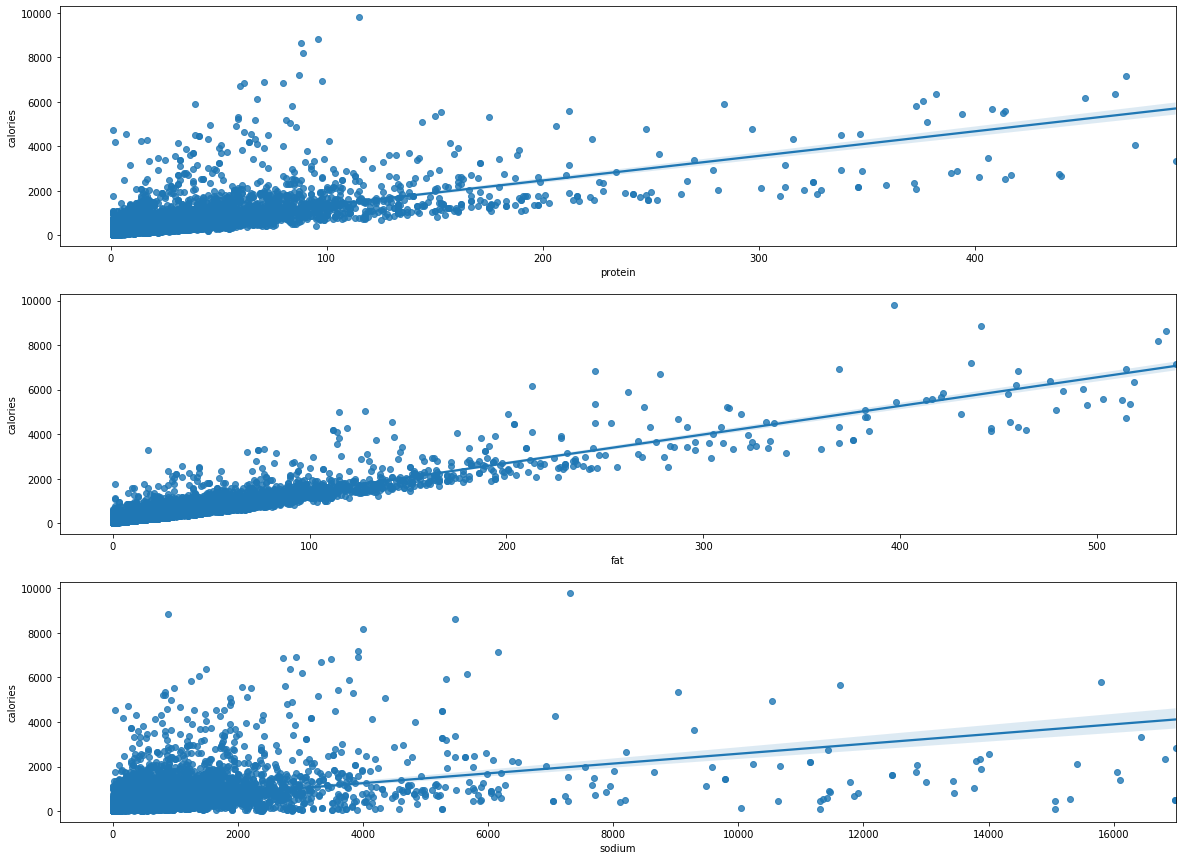

In [19]:
feature=['protein','fat','sodium']
f, axs = plt.subplots(3,3,figsize=(20,15))
for i in range(1,4):
  plt.subplot(3, 1, i)
  sns.regplot(data4[feature[i-1]],data4['calories'])


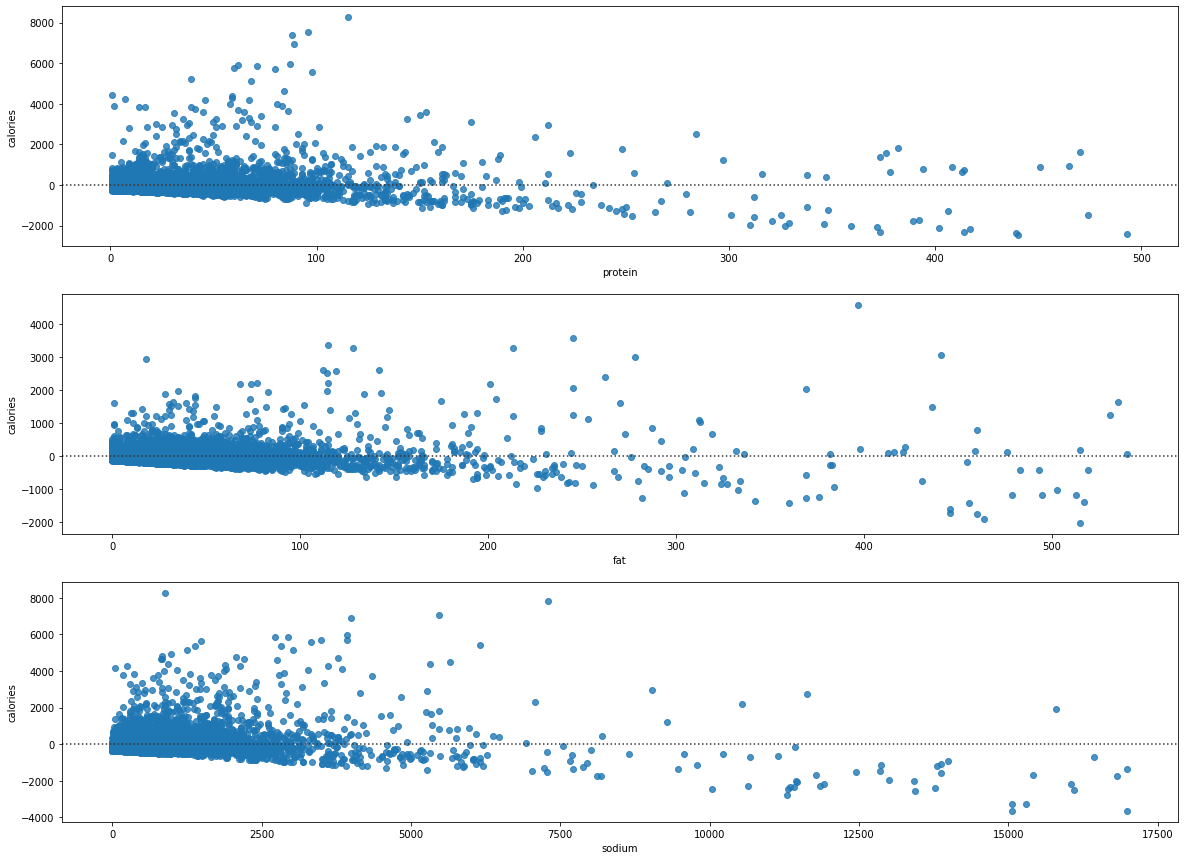

In [20]:
f, axs = plt.subplots(3,3,figsize=(20,15))
for i in range(1,4):
  plt.subplot(3, 1, i)
  sns.residplot(recipesss[feature[i-1]],recipesss['calories'])

In [21]:
data5=recipesss

In [22]:
recipesss.drop(columns=['#cakeweek', '#wasteless'])

,title,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,...,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12774,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12775,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12776,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12777,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> mô tả lại bộ dữ liệu

In [23]:
recipesss.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,snack,snack week,turkey
count,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,...,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000
mean,4.091331,517.835903,22.880272,29.886767,627.864074,0.000470,0.000078,0.001174,0.000783,0.000548,...,0.006182,0.001487,0.023711,0.000078,0.000391,0.016511,0.000157,0.000783,0.000783,0.019720
std,0.639829,565.415404,34.826335,40.500449,1063.969764,0.021664,0.008846,0.034242,0.027964,0.023399,...,0.078385,0.038532,0.152153,0.008846,0.019777,0.127437,0.012510,0.027964,0.027964,0.139041
min,1.250000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,227.000000,4.000000,10.000000,116.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,375.000000,10.000000,19.000000,340.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,626.000000,31.000000,36.000000,769.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,9799.000000,493.000000,540.000000,16988.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` 

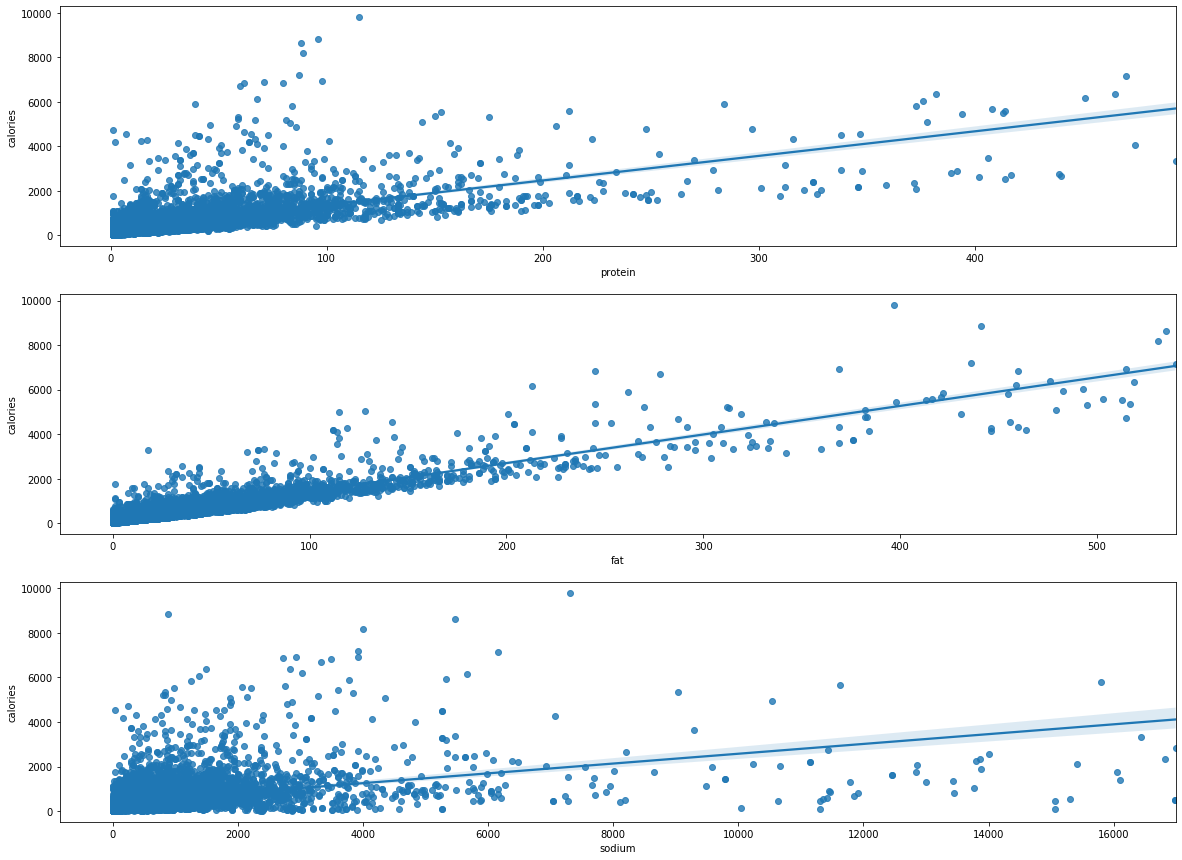

In [24]:
feature=['protein','fat','sodium']
f, axs = plt.subplots(3,3,figsize=(20,15))
for i in range(1,4):
  plt.subplot(3, 1, i)
  sns.regplot(data4[feature[i-1]],data4['calories'])


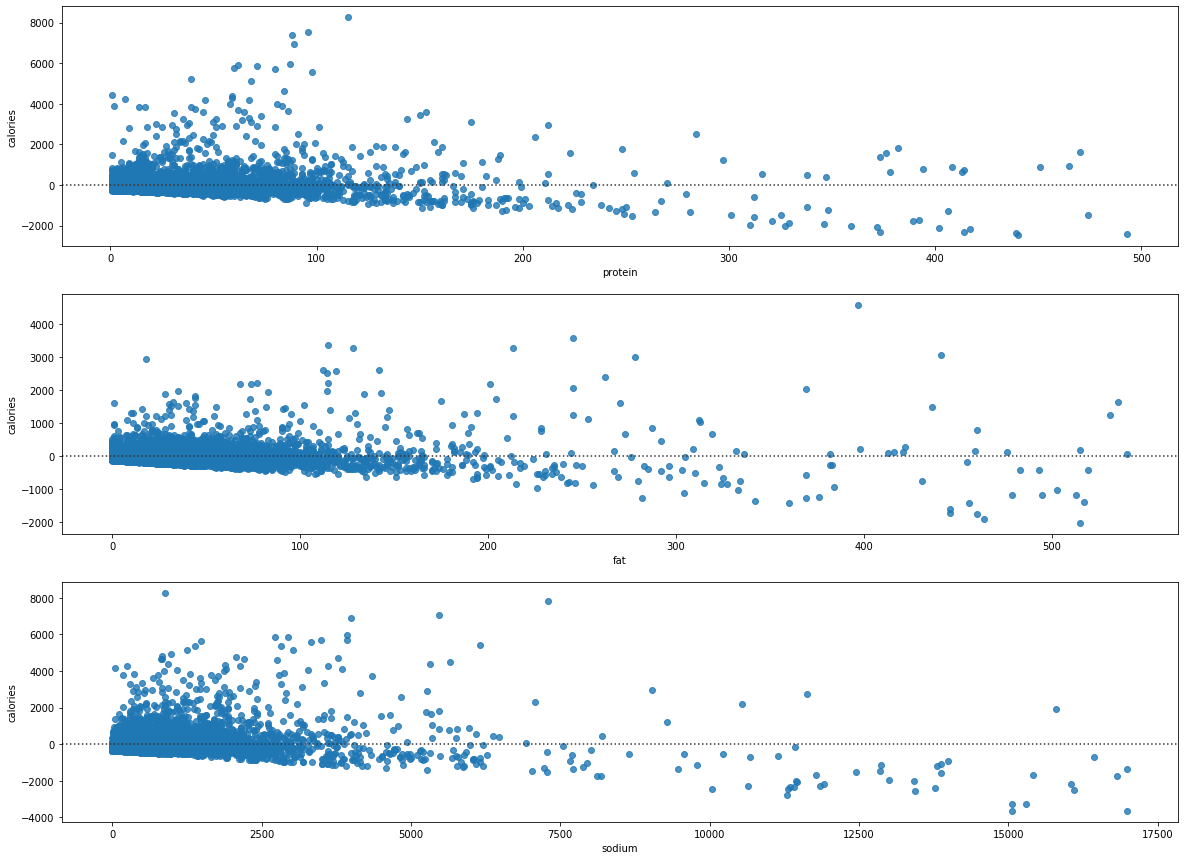

In [25]:
f, axs = plt.subplots(3,3,figsize=(20,15))
for i in range(1,4):
  plt.subplot(3, 1, i)
  sns.residplot(recipesss[feature[i-1]],recipesss['calories'])

In [26]:
recipesss.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,snack,snack week,turkey
count,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,...,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000,12779.000000
mean,4.091331,517.835903,22.880272,29.886767,627.864074,0.000470,0.000078,0.001174,0.000783,0.000548,...,0.006182,0.001487,0.023711,0.000078,0.000391,0.016511,0.000157,0.000783,0.000783,0.019720
std,0.639829,565.415404,34.826335,40.500449,1063.969764,0.021664,0.008846,0.034242,0.027964,0.023399,...,0.078385,0.038532,0.152153,0.008846,0.019777,0.127437,0.012510,0.027964,0.027964,0.139041
min,1.250000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,227.000000,4.000000,10.000000,116.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,375.000000,10.000000,19.000000,340.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,626.000000,31.000000,36.000000,769.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,9799.000000,493.000000,540.000000,16988.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# clasification


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline as pl
from sklearn.preprocessing import StandardScaler as SS 
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import MinMaxScaler as MS
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

> LogisticRegression

In [28]:
def modelLR(X,Y,Z,k):
  #  StS=SS()
    lr=LogisticRegression()
    x_data=X
    y_data=Y
    x_train, x_test, y_train, y_test= train_test_split(x_data,y_data,test_size=Z, random_state=0)
    #x_train=StS.fit_transform(x_train)
    #x_test1=StS.fit(x_test.reshape(1,-1))
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    y_predt=lr.predict(x_train)
    scores1=cross_val_score(lr,x_data,y_data, cv=4)
    scores2=cross_val_score(lr,x_data,y_data, cv=5)
    #thực hiện
    cm1 = confusion_matrix(y_train, y_predt)
    #plot_confusion_matrix(cm,["0","1"])
    
    cm2 = confusion_matrix(y_test, y_pred)
    #plot_confusion_matrix(cm,["0","1"])
    
    return cm1,cm2,f1_score(y_test,y_pred),f1_score(y_train,y_predt),scores1,scores2
from sklearn.metrics import confusion_matrix


dessert


In [29]:
a=[]
for i in recipesss.columns:
    if(i!="title") and (i!="dessert"):
        a.append(i)
modelLR(recipesss[a].values,recipesss["dessert"],0.2,0)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

(array([[8094,  215],
        [ 230, 1684]], dtype=int64),
 array([[2012,   46],
        [  66,  432]], dtype=int64),
 0.8852459016393444,
 0.8832939942302648,
 array([0.95899844, 0.94929577, 0.95461659, 0.96900438]),
 array([0.95539906, 0.95305164, 0.95266041, 0.95618153, 0.95772994]))

kosher

In [30]:
a=[]
for i in recipesss.columns:
    if(i!="title") and (i!="kosher"):
        a.append(i)
modelLR(recipesss[a].values,recipesss["kosher"],0.2,0)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

(array([[6645,  249],
        [ 370, 2959]], dtype=int64),
 array([[1660,   63],
        [  78,  755]], dtype=int64),
 0.9145972138098123,
 0.9053082453724951,
 array([0.94898279, 0.93802817, 0.93208138, 0.9467752 ]),
 array([0.94483568, 0.95070423, 0.95109546, 0.93896714, 0.94716243]))

vegetarican

In [31]:
a=[]
for i in recipesss.columns:
    if(i!="title") and (i!="vegetarian"):
        a.append(i)
modelLR(recipesss[a].values,recipesss["vegetarian"],0.2,0)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

(array([[6385,  210],
        [ 633, 2995]], dtype=int64),
 array([[1578,   71],
        [ 145,  762]], dtype=int64),
 0.8758620689655171,
 0.8766281282013758,
 array([0.91298905, 0.91580595, 0.88826291, 0.86662492]),
 array([0.87910798, 0.91431925, 0.87871674, 0.91353678, 0.8853229 ]))

> svm ( do quá xấu nên kkhoong đưa vào bài và markdown

In [32]:
from sklearn.svm import SVC
def modelSVM(X,Y,Z,k):
  #  StS=SS()
    lr=SVC()
    x_data=X
    y_data=Y
    x_train, x_test, y_train, y_test= train_test_split(x_data,y_data,test_size=Z, random_state=0)
    #x_train=StS.fit_transform(x_train)
    #x_test1=StS.fit(x_test.reshape(1,-1))
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    y_predt=lr.predict(x_train)
    scores1=cross_val_score(lr,x_data,y_data, cv=4)
    scores2=cross_val_score(lr,x_data,y_data, cv=5)
    #thực hiện
    cm1 = confusion_matrix(y_train, y_predt)
    #plot_confusion_matrix(cm,["0","1"])
    
    cm2 = confusion_matrix(y_test, y_pred)
    #plot_confusion_matrix(cm,["0","1"])
    
    return cm1,cm2,f1_score(y_test,y_pred),f1_score(y_train,y_predt),scores1,scores2

In [33]:
a=[]
for i in recipesss.columns:
    if(i!="title") and (i!="vegetarian"):
        a.append(i)
modelSVM(recipesss[a].values,recipesss["vegetarian"],0.2,0)


(array([[6595,    0],
        [3624,    4]], dtype=int64),
 array([[1649,    0],
        [ 907,    0]], dtype=int64),
 0.0,
 0.002202643171806167,
 array([0.64444444, 0.64507042, 0.64475743, 0.64527239]),
 array([0.6443662 , 0.64514867, 0.64514867, 0.64475743, 0.64500978]))

In [34]:
a=[]
for i in recipesss.columns:
    if(i!="title") and (i!="kosher"):
        a.append(i)
modelSVM(recipesss[a].values,recipesss["kosher"],0.2,0)


(array([[6892,    2],
        [3318,   11]], dtype=int64),
 array([[1722,    1],
        [ 832,    1]], dtype=int64),
 0.002395209580838323,
 0.006582884500299222,
 array([0.6741784 , 0.6741784 , 0.67386541, 0.67282405]),
 array([0.67331768, 0.67449139, 0.67449139, 0.67370892, 0.67279843]))

In [35]:
a=[]
for i in recipesss.columns:
    if(i!="title") and (i!="dessert"):
        a.append(i)
modelSVM(recipesss[a].values,recipesss["dessert"],0.2,0)


(array([[8309,    0],
        [1904,   10]], dtype=int64),
 array([[2058,    0],
        [ 496,    2]], dtype=int64),
 0.007999999999999998,
 0.010395010395010394,
 array([0.81189358, 0.81064163, 0.81158059, 0.81183469]),
 array([0.81220657, 0.8114241 , 0.81064163, 0.81181534, 0.81174168]))

# Regression

In [36]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline as pl
from sklearn.preprocessing import StandardScaler as SS 
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import MinMaxScaler as MS

In [37]:
def xaydunggiatri(RMSE,r2_score_train,r2_score_test,Score1,Score2,i,t,h,m):
    pd=[]
    pd.append(i)
    pd.append(m)
    pd.append(h)
    pd.append(RMSE)
    pd.append(r2_score_train)
    pd.append(r2_score_test)
    pd.append(Score1)
    pd.append(Score2)
    pd.append(t)
    return pd

In [38]:
recipesss.reset_index(drop = True,inplace=True)
recipesss
data6=recipesss.copy()

> mô hình random forest

In [39]:
from sklearn.ensemble import RandomForestRegressor as SVR
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import LinearRegression
def MaV(X):
    import statistics 
    mean= statistics.mean(X) 
    s=0
    k=1;
    t=1;
    for i in X:
        k=k+1
        s=s+ (mean-i)**2
    s=s/k
    if (mean>=0.6):
        if(mean-s>=0.6):
            t=0;
    k=str(mean)+" +/- "+str(s)
    return k
def modelLR(X,Y,Z,k):
    #StS=MS()
    lr=SVR(n_estimators=400)
    x_data=X
    y_data=Y
    x_train, x_test, y_train, y_test= train_test_split(x_data,y_data,test_size=Z, random_state=0)
    #x_train=StS.fit_transform(x_train)
    #x_test1=StS.fit(x_test)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    y_predt=lr.predict(x_train)
    RMSE=mean_squared_error(y_pred,y_test)**1/2
    r2_score_train=r2_score(y_predt,y_train)
    r2_score_test=r2_score(y_pred,y_test)
    from sklearn.model_selection import cross_val_score
    scores1=cross_val_score(lr,x_data,y_data, cv=4)
    from sklearn.model_selection import cross_val_score
    scores2=cross_val_score(lr,x_data,y_data, cv=5)
    return RMSE,r2_score_train,r2_score_test,MaV(scores1),MaV(scores2),lr
feature=['protein',"fat","sodium"]
modelLR(recipesss[feature],recipesss["calories"],0.2,0)


(24195.59178778415,
 0.9826562114388527,
 0.8427755141582404,
 '0.8821159593709038 +/- 8.257622509305435e-05',
 '0.8837639152170357 +/- 0.0002487221285988994',
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False))

> mô hình decision tree

In [40]:
from sklearn.ensemble import RandomForestRegressor as SVR
from sklearn.tree import DecisionTreeRegressor as LR
from sklearn.linear_model import LinearRegression
def MaV(X):
    import statistics 
    mean= statistics.mean(X) 
    s=0
    k=1;
    t=1;
    for i in X:
        k=k+1
        s=s+ (mean-i)**2
    s=s/k
    if (mean>=0.6):
        if(mean-s>=0.6):
            t=0;
    k=str(mean)+" +/- "+str(s)
    return k
def modelLR(X,Y,Z,k):
    #StS=MS()
    lr=LR(max_depth=50)
    x_data=X
    y_data=Y
    x_train, x_test, y_train, y_test= train_test_split(x_data,y_data,test_size=Z, random_state=0)
    #x_train=StS.fit_transform(x_train)
    #x_test1=StS.fit(x_test)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    y_predt=lr.predict(x_train)
    RMSE=mean_squared_error(y_pred,y_test)**1/2
    r2_score_train=r2_score(y_predt,y_train)
    r2_score_test=r2_score(y_pred,y_test)
    from sklearn.model_selection import cross_val_score
    scores1=cross_val_score(lr,x_data,y_data, cv=4)
    from sklearn.model_selection import cross_val_score
    scores2=cross_val_score(lr,x_data,y_data, cv=5)
    return RMSE,r2_score_train,r2_score_test,MaV(scores1),MaV(scores2),lr
feature=['protein',"fat","sodium"]
modelLR(recipesss[feature],recipesss["calories"],0.2,0)


(34440.32502938503,
 0.9986590963749734,
 0.7884841562176851,
 '0.8038685522479401 +/- 0.00016978683054534068',
 '0.791745063387999 +/- 4.680940768920004e-05',
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'))

> mô hình linear regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline as pl
from sklearn.preprocessing import StandardScaler as SS 
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import MinMaxScaler as MS
def MaV(X):
    import statistics 
    mean= statistics.mean(X) 
    s=0
    k=1;
    t=1;
    for i in X:
        k=k+1
        s=s+ (mean-i)**2
    s=s/k
    if (mean>=0.6):
        if(mean-s>=0.6):
            t=0;
    k=str(mean)+" +/- "+str(s)
    return k
def modelLR(X,Y,Z,k):
    #StS=MS()
    lr=LinearRegression()
    x_data=X
    y_data=Y
    x_train, x_test, y_train, y_test= train_test_split(x_data,y_data,test_size=Z, random_state=0)
    #x_train=StS.fit_transform(x_train)
    #x_test1=StS.fit(x_test)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    y_predt=lr.predict(x_train)
    RMSE=mean_squared_error(y_pred,y_test)**1/2
    r2_score_train=r2_score(y_predt,y_train)
    r2_score_test=r2_score(y_pred,y_test)
    from sklearn.model_selection import cross_val_score
    scores1=cross_val_score(lr,x_data,y_data, cv=4)
    from sklearn.model_selection import cross_val_score
    scores2=cross_val_score(lr,x_data,y_data, cv=5)
    return RMSE,r2_score_train,r2_score_test,MaV(scores1),MaV(scores2),lr,y_pred,y_test
feature=['protein','fat','sodium']
RMSE,r2_score_train,r2_score_test,scores1,MaVscores2,lr,y_pred,y_test=modelLR(recipesss[feature],recipesss["calories"],0.3,0)
modelLR(recipesss[feature],recipesss["calories"],0.3,0)
#sns.regplot(y_pred,y_test)

(25107.413883314443,
 0.8706816789792975,
 0.8368386690941154,
 '0.8779508924069033 +/- 5.452488624235131e-06',
 '0.8783811677065609 +/- 0.00035281718338341317',
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 array([2807.46700268,  896.71793263,  116.55052177, ...,  329.74093987,
         500.28655604,  222.38669914]),
 12719    2417.0
 12162    1151.0
 2894       31.0
 10720     270.0
 9777      201.0
           ...  
 2580      324.0
 7850     6043.0
 257       280.0
 321       366.0
 7166      290.0
 Name: calories, Length: 3834, dtype: float64)

#  chọn mô hình linear Regression để ve

In [42]:
model8 = LinearRegression()
Y = recipesss['calories']
Z = recipesss[['protein','fat','sodium']]
model8.fit(Z,Y)
Yhat8 = model8.predict(Z)

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


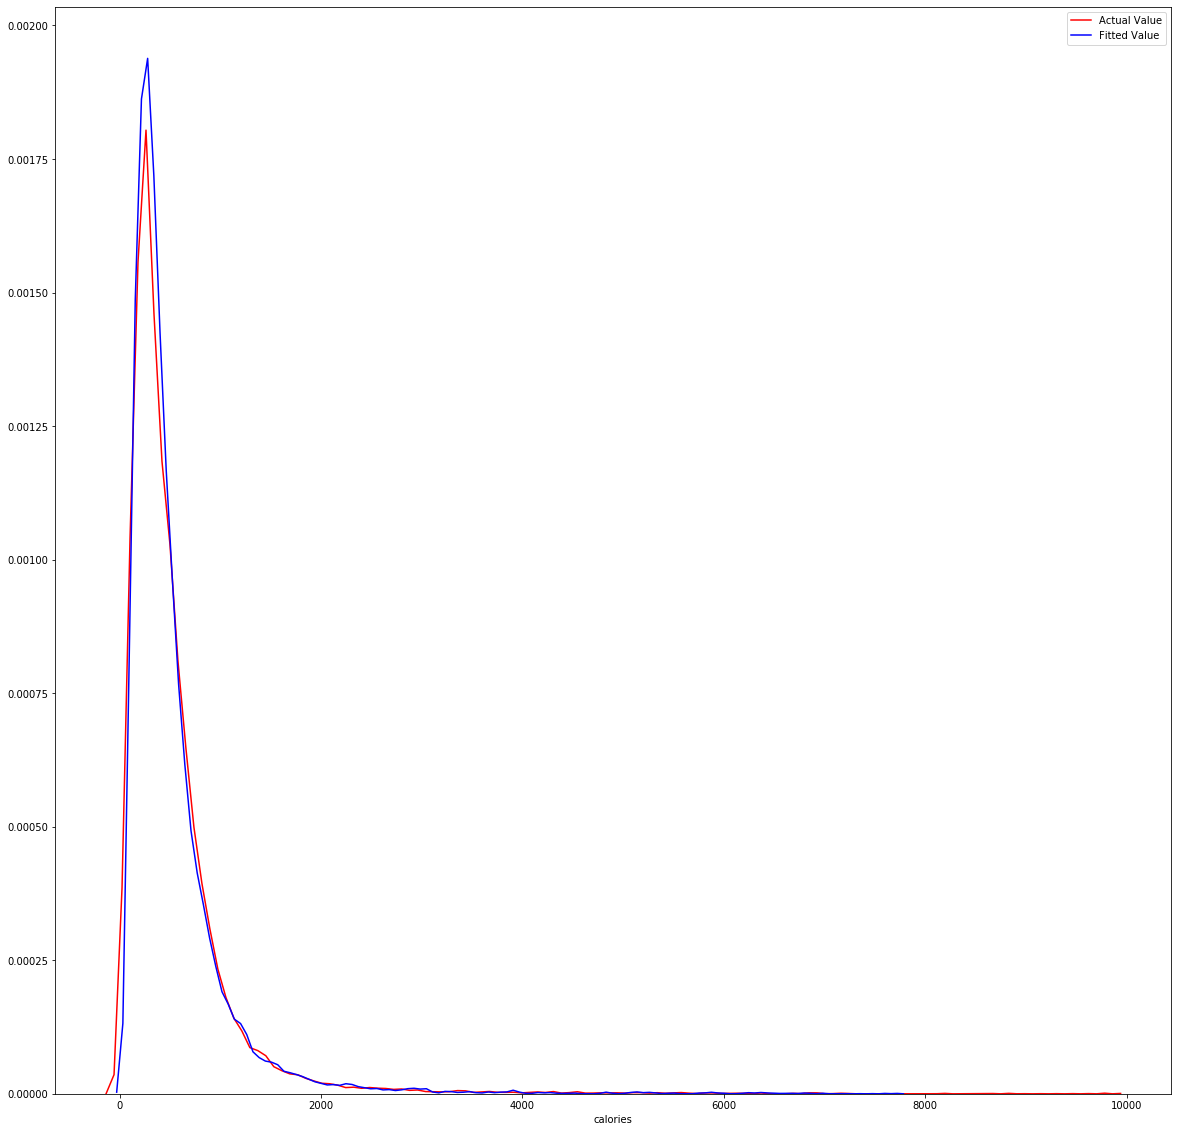

In [43]:
f, axs = plt.subplots(1,1,figsize=(20,20))
ax1= sns.distplot(recipesss['calories'],hist=False,color='r',label='Actual Value')
sns.distplot(Yhat8, hist=False,  color='b',label='Fitted Value',ax=ax1)


In [44]:
dat=pd.DataFrame([y_pred,y_test])
dat

,0,1,2,3,4,5,6,7,8,9,...,3824,3825,3826,3827,3828,3829,3830,3831,3832,3833
0,3364.229747,780.206413,85.67402,474.988362,184.436702,936.999042,292.500115,172.653292,2188.723357,1730.831954,...,166.486591,364.758985,199.192121,367.538815,517.587117,128.388924,6451.431628,351.424306,537.348663,211.423765
1,2417.000000,1151.000000,31.00000,270.000000,201.000000,967.000000,413.000000,297.000000,1861.000000,1662.000000,...,185.000000,497.000000,145.000000,265.000000,539.000000,324.000000,6043.000000,280.000000,366.000000,290.000000


In [45]:
from sklearn.preprocessing import PolynomialFeatures
transform=PolynomialFeatures(degree =4)
X_poly = transform.fit_transform(np.array(X_train).reshape(-1,1))
X_test_poly=transform.fit_transform(np.array(X_test).reshape(-1,1))
poly_lin=LinearRegression()
poly_lin.fit(X_poly,Y_train)
poly_lin.fit(X_test_poly,Y_test)
plt.scatter(X_train, Y_train,color ='red')
plt.plot(X_train, poly_lin.predict(X_poly),color= 'blue')
plt.title('positition level vs salary ')
plt.xlabel('positition level ')
plt.ylabel('salary')
plt.show()

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline as pl
from sklearn.preprocessing import StandardScaler as SS 
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import MinMaxScaler as MS
def MaV(X):
    import statistics 
    mean= statistics.mean(X) 
    s=0
    k=1;
    t=1;
    for i in X:
        k=k+1
        s=s+ (mean-i)**2
    s=s/k
    if (mean>=0.6):
        if(mean-s>=0.6):
            t=0;
    k=str(mean)+" +/- "+str(s)
    return k
def modelLR(X,Y,Z,k):
    #StS=MS()
    lr=LinearRegression()
    x_data=X
    y_data=Y
    x_train, x_test, y_train, y_test= train_test_split(x_data,y_data,test_size=Z, random_state=0)
    #x_train=StS.fit_transform(x_train)
    #x_test1=StS.fit(x_test)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    y_predt=lr.predict(x_train)
    RMSE=mean_squared_error(y_pred,y_test)**1/2
    r2_score_train=r2_score(y_predt,y_train)
    r2_score_test=r2_score(y_pred,y_test)
    from sklearn.model_selection import cross_val_score
    scores1=cross_val_score(lr,x_data,y_data, cv=4)
    from sklearn.model_selection import cross_val_score
    scores2=cross_val_score(lr,x_data,y_data, cv=5)
    return RMSE,r2_score_train,r2_score_test,MaV(scores1),MaV(scores2),lr,y_predt,y_train
feature=['protein','fat','sodium']
RMSE,r2_score_train,r2_score_test,scores1,MaVscores2,lr,y_pred,y_test=modelLR(recipes[feature],recipes["calories"],0.3,0)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
feature=['protein','fat','sodium',"calories"]
f, axs = plt.subplots(2,2,figsize=(20,15))
for i in range(1,4):
  plt.subplot(2, 2, i)
  sns.regplot(recipesss[feature[i-1]],recipesss["rating"])


In [ ]:
recipesss

In [ ]:
veg_nv = recipes.groupby(["vegetarian"])["title"].count()
plt.figure(figsize=(4,4))
plt.pie(veg_nv,labels=["non-vegeterian","vegeterian"],autopct='%1.1f%%', startangle=90, colors=["tomato","lightgreen"])
plt.axis("equal")
plt.title("Composistion of Veg and Non-Veg Recipes")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# sample data
raw_data = {'officer_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'jan_arrests': [4, 24, 31, 2, 3],
        'feb_arrests': [25, 94, 57, 62, 70],
        'march_arrests': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['officer_name', 'jan_arrests', 'feb_arrests', 'march_arrests'])
df['total_arrests'] = df['jan_arrests'] + df['feb_arrests'] + df['march_arrests']

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df.plot(kind='pie', y = 'total_arrests', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df['officer_name'], legend = False, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, df, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()